# Perlin / Simplex Noise Visualization

Here we'll try to understand what [Perlin Noise](https://en.wikipedia.org/wiki/Perlin_noise)
and the newer [Simplex Noise](https://en.wikipedia.org/wiki/Simplex_noise).

Both ultimately provide a value for a given coordinate, say (x,y) and a given seed.

![Screenshot of chart](../img/noiseVisualization_dotChart.svg)

However, Simplex provides values at higher dimensions much more easily: `O(N^2)`, and provides a smoother gradient among values:

![Screenshot of the light animation](../img/svgAnimation2Light.gif)

# Libraries Used

Note that we use one additional library for simplex noise:

If using NodeJS, there are a few options:

* [simplex-noise](https://www.npmjs.com/package/simplex-noise)
* [noisejs](https://www.npmjs.com/package/noisejs)
                                         
(This was used mostly in generating the SVGs, and simply converting from `embed` to `render` ... and removing the calls to `window`)

In [1]:
utils = require('jupyter-ijavascript-utils')
NoiseJS = require('noisejs').Noise;
noise = new NoiseJS();
['utils', 'noise']

[ 'utils', 'noise' ]

# Start / Stop the Animation

As with any animation, it is important to have an ability to stop if unexpected things happen while playing around.

The animation will stop if `window.stopAnimation` is true.

Executing this cell will tell the animation to restart.

(This is helpful if `cancelAnimationFrame` isn't supported: see https://caniuse.com/?search=animationFrame)

In [2]:
//-- it is always useful to have some means of stopping animations when exploring

utils.ijs.htmlScript({
    width: 10, height: 10,
    utilityFunctions: { ...utils.svg.utilityFunctions },
    onReady: () => {        
        if (window.stopAnimation !== undefined) {
            console.log('restarting animation');
            window.stopAnimation = true;
            window.setTimeout(() => {
                console.log('allowing animation again');
                window.stopAnimation = false;
            }, 500);            
        }
    }
});

//-- an alternative option was made available through:
//-- https://jupyter-ijavascript-utils.onrender.com/module-svg_utilityFunctions.html
/*
utils.ijs.htmlScript({
    
    //-- pack the nodejs functions we want available client side / within javascript
    utilityFunctions: { ...utils.svg.utilityFunctions },
    
    //-- accept them onReady - see ijs/htmlScript
    onReady: ({ utilityFunctions }) => {
        const animation = utilityFunctions.animationFrameCalls();
        animation.resetAllAnimations();
     }
})
*/

# Perlin vs Simplex Noise

Perlin Noise was made by Ken Perlin for the Movie `Tron` to produce more natural feeling computer generated textures.

Simplex Noise is similar to Perlin Noise, but with the following consequences:

* lower computational complexity and requires fewer multiplications
* scales to higher dimensions (4D, 5D) with much less computational cost: {\displaystyle O(n^{2})}O(n^{2})
* no noticeable directional artifacts
  * (although 2d view of 3d noise looks more jagged; getting more jagged with higher dimensions)
* a well-defined and continuous gradient (almost) everywhere
* easy to implement in hardware
                                                                           
For our case we'll be using the `Simplex` version of noise

## Understanding the data

Lets show the values based on how much it fluctuates.

(Here we create a table, executing a function for every row and column, and generate a noise2d value)

In [3]:
{
    const numColumns = 20;
    const numRows = 20;
    const scale = 0.05;
    
    const colorRange = new utils.svg.svgJS.Color('#F00').to('#0F0');
    
    new utils.TableGenerator(
        utils.array.size(numRows, (yIndex) => 
            utils.array.size(numColumns, (xIndex) => 
                noise.simplex2(xIndex * scale, yIndex * scale)))
        .reverse()
    )
    .styleCell(({ value }) => `color: ${colorRange.at( value / 2 + 0.5 ).toHex()}`)
    .render();
}

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
-0.424,-0.382,-0.345,-0.31,-0.272,-0.225,-0.168,-0.1,-0.021,0.064,0.15,0.222,0.261,0.251,0.185,0.072,-0.068,-0.205,-0.313,-0.366
-0.316,-0.273,-0.229,-0.181,-0.125,-0.059,0.017,0.102,0.192,0.281,0.361,0.424,0.453,0.434,0.361,0.241,0.095,-0.051,-0.171,-0.244
-0.181,-0.147,-0.105,-0.054,0.009,0.084,0.169,0.261,0.354,0.441,0.514,0.564,0.583,0.557,0.483,0.367,0.226,0.083,-0.04,-0.123
-0.031,-0.015,0.012,0.053,0.11,0.181,0.263,0.352,0.44,0.519,0.581,0.619,0.628,0.601,0.534,0.432,0.308,0.178,0.063,-0.017
0.119,0.109,0.112,0.131,0.168,0.222,0.29,0.365,0.44,0.506,0.556,0.585,0.587,0.563,0.51,0.43,0.33,0.223,0.129,0.066
0.253,0.216,0.189,0.178,0.186,0.213,0.255,0.308,0.364,0.414,0.452,0.472,0.473,0.454,0.417,0.36,0.289,0.215,0.152,0.116
0.355,0.292,0.236,0.194,0.17,0.165,0.177,0.203,0.236,0.267,0.29,0.303,0.303,0.292,0.269,0.236,0.197,0.158,0.133,0.13
0.411,0.328,0.247,0.178,0.125,0.09,0.073,0.07,0.077,0.086,0.094,0.098,0.098,0.095,0.087,0.077,0.068,0.067,0.078,0.109
0.419,0.32,0.221,0.13,0.054,-0.004,-0.046,-0.073,-0.091,-0.104,-0.113,-0.118,-0.118,-0.114,-0.105,-0.092,-0.072,-0.042,0.002,0.062
0.383,0.273,0.161,0.056,-0.034,-0.108,-0.166,-0.212,-0.25,-0.282,-0.307,-0.321,-0.321,-0.309,-0.285,-0.25,-0.205,-0.148,-0.079,-0.001


## Showing with a Visual Graph

Here is the same data shown as a graph - with values as the size of the circle

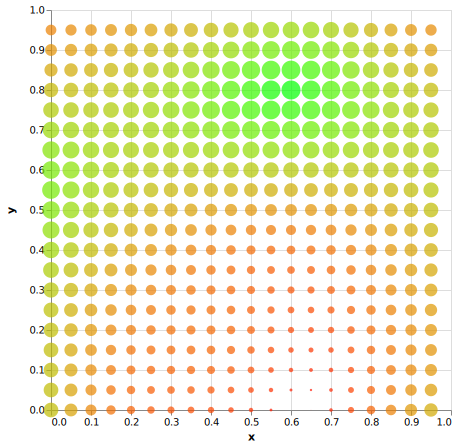

In [4]:
{
    const numColumns = 20;
    const numRows = 20;
    const scale = 0.05;
    utils.vega.svg((vl) => vl.markPoint({shape: 'circle', filled: true})
      .data(
        utils.array.size(numRows, (yIndex) => 
            utils.array.size(numColumns, (xIndex) => ({x: xIndex * scale, y: yIndex * scale, val: noise.simplex2(xIndex * scale, yIndex * scale) }))
        ).flat()
      )
      .width(400).height(400)
      .encode(
        vl.x().fieldQ('x'),
        vl.y().fieldQ('y'),
        vl.color().fieldQ('val').legend(null).scale({"range": ["#F00", "#0F0"]}),
        //vl.color().fieldQ('val').legend(null).scale({scheme: 'rainbow'}),
        //vl.angle().fieldQ('val').legend(null), //.scale({domain: [0, 360], range: [-1, 1] })
        vl.size().fieldQ('val').legend(null)
      )
      //.background('black')
    )
}

## Looking at the Gradient

Notice that following each of the axes, [there is a clear and defined gradient](https://betterexplained.com/articles/vector-calculus-understanding-the-gradient/) so that the line appears to have a smooth velocity applied - avoiding `jerk` or `jaggedness`.

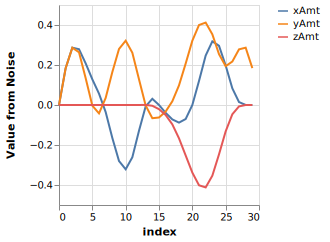

In [5]:
generateNoise = (index, inc, xOffset = 0, yOffset = 0, zOffset = 0) => {
    const val = index * inc;
    
    return ({
        index,
        xAmt: noise.simplex3(xOffset + val, yOffset, zOffset),
        yAmt: noise.simplex3(xOffset, yOffset + val, zOffset),
        zAmt: noise.simplex3(xOffset, yOffset, zOffset + val)
    });
}

len = 30;
amt = .1;

utils.vega.svgFromSpec({
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "data": {
    values: utils.array.size(len, (index) => generateNoise(index, amt))
  },
  "repeat": {
    "layer": ["xAmt", "yAmt", "zAmt"]
  },
  "spec": {
    "mark": "line",
    "encoding": {
      "x": {
        "field": "index",
        "type": "quantitative"
      },
      "y": {
        "field": {"repeat": "layer"},
        "type": "quantitative",
        "title": "Value from Noise"
      },
      "color": {
        "datum": {"repeat": "layer"},
        "type": "nominal"
      }
    }
  }
})

# Animation showing the value

Lets try using the current time to calculate two random values:

* direction of the arrow
* length of the arrow

Note that the svg.render uses `ijs.htmlScript` as its basis,
so we can parameterize the data used in the call within the `data` option.

Also, the functions are written in node (executed in the Jupyter Lab),
but are executed in JavaScript.

Both the `data` provided, and functions provided on the `utilityFunctions` are available within the `onReady` call

In [6]:
utils.svg.embed({
    debug: false,
    
    //-- width of the SVG Scene
    width: 720,
    //-- height of the SVG Scene
    height: 360,
    data: {
        //-- number of indicators along x and y axis
        xCount: 48,
        yCount: 24,
        //-- background color
        backgroundColor: '#FFF',
        //-- color range: 0: startingColor, 1: ending color
        initialColor: '#F0F',
        finalColor: '#0FF',
        //-- how fast or slow the period resets, simplex provides 1 cycle per period
        timePeriod: 10000,
        //-- how closely related the direction and length are in time
        timeOffset: 5000,
        //-- the minimum / maximum lengths of the indicators
        minLength: 10,
        maxLength: 50,
        //-- opacity and width of line
        width: 4,
        opacity: 0.2,
        //-- sensitivity [0 - 1]
        directionSensitivity: 0.8,
        lengthSensitivity: 0.4,
    },

    //-- include the perlin noise library in javascript
    scripts: ['https://cdn.rawgit.com/josephg/noisejs/master/perlin.js'],

    //-- accept the arguments we want passed
    //-- el: html element already setup for SVG.js
    //-- SVG: the SVG.js library (used for ColorRanges, etc.)
    //-- data: the data object above from NodeJS - now in JavaScript
    //-- utilityFunctions: the functions passed from NodeJS - now in JavaScript
    //-- the width and height sent
    //-- see utils.svg.embed for more:
    //-- https://jupyter-ijavascript-utils.onrender.com/module-svg.html
    onReady: ({ el, SVG, data, height, width, utilityFunctions: lib }) => {
        
        //-- make the background black
        el.node.setAttribute('style', `background-color: ${data.backgroundColor}`);
        
        const xCount = data.xCount;
        const yCount = data.yCount;
        
        const xRangeInc = 1 / xCount;
        const yRangeInc = 1 / yCount;
        
        const xInc = width / xCount;
        const yInc = height / yCount;
        
        const xMid = width / 2;
        const yMid = height / 2;
        
        const PI2 = Math.PI * 2;
        // const noiseRange = [-1, 1];
        
        const colorRange = new SVG.Color(data.initialColor).to(data.finalColor);
        
        const directionRange = [-data.directionSensitivity, data.directionSensitivity];
        const lengthRange = [-data.lengthSensitivity, data.lengthSensitivity];
        
        //-- initialize lines
        const lines = lib.size(yCount)
            .map(() => lib.size(xCount, () => el.line()));
        
        const [ requestAnimationFrame, cancelAnimationFrame ] = lib.animationFrameCalls();
        
        //-- note that cancel is not supported in all cases
        //-- see https://caniuse.com/?search=animationFrame
        //-- and manual stop below
        
        if (window.currentAnimation) {
            cancelAnimationFrame(window.currentAnimation);
            window.currentAnimation = null;
        }
        
        const renderLines = () => {
            //-- render line
            let zDir = lib.mapTime(new Date().getTime(), data.timePeriod);
            let zLen = lib.mapTime(new Date().getTime() + data.timeOffset, data.timePeriod);
            lines.forEach((row, rowIndex) => {
                row.forEach((line, colIndex) => {
                    const valDir = noise.simplex3(colIndex * xRangeInc, rowIndex * yRangeInc, zDir);
                    const dir = lib.mapDomain(valDir, directionRange, [0, PI2]);

                    const valLen = noise.simplex3(colIndex * xRangeInc, rowIndex * yRangeInc, zLen);
                    const len = lib.mapDomain(valLen, lengthRange, [data.minLength, data.maxLength]);
                    const colorC = lib.mapDomain(valLen, lengthRange, [0, 1]);

                    lib.plotLine(line, xInc, yInc, colIndex, rowIndex, dir, len);
                    lib.styleLine(line, colorRange, colorC, data.width, data.opacity);
                })
            });
            
            //-- stop the animation
            if (window.stopAnimation == true) {
                console.log('stopping animation');
                window.currentAnimation = null;
            } else {
                window.currentAnimation = window.requestAnimationFrame(renderLines);
            }
        };
        renderLines();
    },
    utilityFunctions: {
        animationFrameCalls: () => {
            const requestAnimationFrame = window.requestAnimationFrame
                || window.mozRequestAnimationFrame
                || window.webkitRequestAnimationFrame
                || window.msRequestAnimationFrame;
            const cancelAnimationFrame = window.cancelAnimationFrame
                || window.mozCancelAnimationFrame;
            
            return [requestAnimationFrame, cancelAnimationFrame];
        },
        size: function size(length, defaultValue) {
          if (typeof defaultValue === 'function') {
            return new Array(length).fill(null).map((_, index) => defaultValue(index));
          }
          return  new Array(length).fill(defaultValue);
        },
        mapDomain: (val, [origMin, origMax], [newMin, newMax]) => {
            // origMin / val / origMax = newMin / result / newMax
            // (val - origMin) / (origMax - origMin) = (result - newMin) / (newMax - newMin)
            // (val - origMin) * (newMax - newMin) / (origMax - origMin) = result - newMin;
            // (val - origMin) * (newMax - newMin) / (origMax - origMin) + newMin = result
            return (val - origMin) * (newMax - newMin) / (origMax - origMin) + newMin;
        },
        mapTime: (t, period) => {
            return t / period;
            // return (t.getTime() % period) / period;
        },
        plotLine:(line, xInc, yInc, x, y, dir, mag) => {
            const xOff = xInc * x;
            const yOff = yInc * y;
            line.plot(
                xOff,
                yOff,
                xOff + Math.cos(dir) * mag,
                yOff + Math.sin(dir) * mag
            )
        },
        styleLine: (line, colorRange, c, width = 1, opacity = 1) => {
            line.stroke({
                color: colorRange.at(c).toHex(),
                width,
                opacity,
                linecap: 'round'
            });
        }
    }
})

(If stopped, run the cell above again, see the section on stopping the animations for more)

## Alternative using the library functions

Instead of spelling out the functions, here is the same animation, but importing the library functions into the utilityFunctions.

In [7]:
utils.svg.embed({
    debug: false,
    
    //-- width of the SVG Scene
    width: 720,
    //-- height of the SVG Scene
    height: 360,
    data: {
        //-- number of indicators along x and y axis
        xCount: 48,
        yCount: 24,
        //-- background color
        backgroundColor: '#FFF',
        //-- color range: 0: startingColor, 1: ending color
        initialColor: '#F0F',
        finalColor: '#0FF',
        //-- how fast or slow the period resets, simplex provides 1 cycle per period
        timePeriod: 10000,
        //-- how closely related the direction and length are in time
        timeOffset: 5000,
        //-- the minimum / maximum lengths of the indicators
        minLength: 10,
        maxLength: 50,
        //-- opacity and width of line
        width: 4,
        opacity: 0.2,
        //-- sensitivity [0 - 1]
        directionSensitivity: 0.8,
        lengthSensitivity: 0.4,
    },
    scripts: ['https://cdn.rawgit.com/josephg/noisejs/master/perlin.js'],
    onReady: ({ el, SVG, data, height, width, utilityFunctions: lib }) => {
        
        //-- make the background black
        el.node.setAttribute('style', `background-color: ${data.backgroundColor}`);
        
        const xCount = data.xCount;
        const yCount = data.yCount;
        
        const xRangeInc = 1 / xCount;
        const yRangeInc = 1 / yCount;
        
        const xInc = width / xCount;
        const yInc = height / yCount;
        
        const xMid = width / 2;
        const yMid = height / 2;
        
        const PI2 = Math.PI * 2;
        // const noiseRange = [-1, 1];
        
        const colorRange = new SVG.Color(data.initialColor).to(data.finalColor);
        
        const directionRange = [-data.directionSensitivity, data.directionSensitivity];
        const lengthRange = [-data.lengthSensitivity, data.lengthSensitivity];
        
        //-- initialize lines
        const lines = lib.size(yCount)
            .map(() => lib.size(xCount, () => el.line()));
        
        const animationCalls = lib.animationFrameCalls();
        
        animationCalls.stopOtherAnimations();
        
        const renderLines = () => {
            //-- render line
            let zDir = lib.timePeriod(data.timePeriod, new Date().getTime());
            let zLen = lib.timePeriod(data.timePeriod, new Date().getTime() + data.timeOffset);
            lines.forEach((row, rowIndex) => {
                row.forEach((line, colIndex) => {
                    const valDir = noise.simplex3(colIndex * xRangeInc, rowIndex * yRangeInc, zDir);
                    const dir = lib.mapDomain(valDir, directionRange, [0, PI2]);

                    const valLen = noise.simplex3(colIndex * xRangeInc, rowIndex * yRangeInc, zLen);
                    const len = lib.mapDomain(valLen, lengthRange, [data.minLength, data.maxLength]);
                    const colorC = lib.mapDomain(valLen, lengthRange, [0, 1]);

                    lib.plotLine(line, xInc, yInc, colIndex, rowIndex, dir, len);
                    lib.styleLine(line, colorRange, colorC, data.width, data.opacity);
                })
            });
            
            if (animationCalls.checkAnimationsAllowed()) {
                animationCalls.nextAnimationFrame(renderLines);
            }
        };
        renderLines();
    },
    utilityFunctions: {
        plotLine:(line, xInc, yInc, x, y, dir, mag) => {
            const xOff = xInc * x;
            const yOff = yInc * y;
            line.plot(
                xOff,
                yOff,
                xOff + Math.cos(dir) * mag,
                yOff + Math.sin(dir) * mag
            )
        },
        styleLine: (line, colorRange, c, width = 1, opacity = 1) => {
            line.stroke({
                color: colorRange.at(c).toHex(),
                width,
                opacity,
                linecap: 'round'
            });
        },
        
        //-- see svg/utilityFunctions.animationFrameCalls
        animationFrameCalls: utils.svg.utilityFunctions.animationFrameCalls,
        
        //-- see array.size as an alternative, and simply import it instead
        size: utils.array.size,
        
        //-- see format.mapDomain as alternative, and simply import instead
        mapDomain: utils.format.mapDomain,
        
        //-- see format.mapPeriod as alternative, and simply import it instead
        timePeriod: utils.format.timePeriod
    }
})

# X and Y Roll

Alternative version, where instead:

* the X and Y are calculated separately (y being generated on a timeOffset from x)
* the X and Y values are then projected onto cosine and sine respectively
* and then length is determined based on those components

In [8]:
utils.svg.embed({
    debug: false,
    
    //-- width of the SVG Scene
    width: 720,
    //-- height of the SVG Scene
    height: 360,
    data: {
        //-- number of indicators along x and y axis
        xCount: 48,
        yCount: 24,
        //-- background color
        backgroundColor: '#000',
        //-- color range: 0: startingColor, 1: ending color
        initialColor: '#F0F',
        finalColor: '#0FF',
        //-- how fast or slow the period resets, simplex provides 1 cycle per period
        timePeriod: 10000,
        //-- how closely related the direction and length are in time
        timeOffset: 5000,
        //-- the minimum / maximum lengths of the indicators
        minLength: 10,
        maxLength: 50,
        //-- opacity and width of line
        width: 4,
        // opacity: 0.2, //-- not used
    },
    scripts: ['https://cdn.rawgit.com/josephg/noisejs/master/perlin.js'],
    onReady: ({ el, SVG, data, height, width, utilityFunctions: lib }) => {
        
        //-- make the background black
        el.node.setAttribute('style', `background-color: ${data.backgroundColor}`);
        
        const xCount = data.xCount;
        const yCount = data.yCount;
        
        const xRangeInc = 1 / xCount;
        const yRangeInc = 1 / yCount;
        
        const xInc = width / xCount;
        const yInc = height / yCount;
        
        const PI2 = Math.EI * 2;
        const RT2 = Math.sqrt(2);
        
        const colorRange = new SVG.Color(data.initialColor).to(data.finalColor);
        
        const lengthRange = data.maxLength - data.minLength;
        
        //-- initialize lines
        const lines = lib.size(yCount)
            .map(() => lib.size(xCount, () => el.line()));
        
        const [ requestAnimationFrame, cancelAnimationFrame ] = lib.animationFrameCalls();
        
        //-- note that cancel is not supported in all cases
        //-- see https://caniuse.com/?search=animationFrame
        //-- and manual stop below
        
        if (window.currentAnimation) {
            cancelAnimationFrame(window.currentAnimation);
            window.currentAnimation = null;
        }
        
        const renderLines = () => {
            //-- render line
            let zX = lib.mapTime(new Date().getTime(), data.timePeriod);
            let zY = lib.mapTime(new Date().getTime() + data.timeOffset, data.timePeriod);
            lines.forEach((row, rowIndex) => {
                row.forEach((line, colIndex) => {
                    const forceX = noise.simplex3(
                        colIndex * xRangeInc,
                        rowIndex * yRangeInc,
                        zX
                    );
                    const forceY = noise.simplex3(
                        colIndex * xRangeInc,
                        rowIndex * yRangeInc,
                        zY
                    );
                    // const length = Math.sqrt(forceX * forceX + forceY * forceY);
                    const length = ( Math.abs(forceX) + Math.abs(forceY) ) / 2;
                    const mappedLength = lib.mapDomain(length, [0, 1], [data.minLength, data.maxLength]);
                    
                    const rotatedX = Math.cos(forceX * Math.PI) * mappedLength;
                    const rotatedY = Math.sin(forceY * Math.PI) * mappedLength;
                    
                    lib.plotLine(line, xInc, yInc, colIndex, rowIndex, rotatedX, rotatedY);

                    const colorC = length; // lib.mapDomain(length, [0, 1], [0, 1]);
                    
                    lib.styleLine(line, colorRange, colorC, data.width, colorC);
                })
            });
            
            //-- stop the animation
            if (window.stopAnimation == true) {
                console.log('animation noticed stop');
                window.currentAnimation = null;
            } else {
                window.currentAnimation = window.requestAnimationFrame(renderLines);
            }
        };
        renderLines();
    },
    utilityFunctions: {
        animationFrameCalls: () => {
            const requestAnimationFrame = window.requestAnimationFrame
                || window.mozRequestAnimationFrame
                || window.webkitRequestAnimationFrame
                || window.msRequestAnimationFrame;
            const cancelAnimationFrame = window.cancelAnimationFrame
                || window.mozCancelAnimationFrame;
            
            return [requestAnimationFrame, cancelAnimationFrame];
        },
        size: function size(length, defaultValue) {
          if (typeof defaultValue === 'function') {
            return new Array(length).fill(null).map((_, index) => defaultValue(index));
          }
          return  new Array(length).fill(defaultValue);
        },
        mapDomain: (val, [origMin, origMax], [newMin, newMax]) => {
            // origMin / val / origMax = newMin / result / newMax
            // (val - origMin) / (origMax - origMin) = (result - newMin) / (newMax - newMin)
            // (val - origMin) * (newMax - newMin) / (origMax - origMin) = result - newMin;
            // (val - origMin) * (newMax - newMin) / (origMax - origMin) + newMin = result
            return (val - origMin) * (newMax - newMin) / (origMax - origMin) + newMin;
        },
        mapTime: (t, period) => {
            return t / period;
            // return (t.getTime() % period) / period;
        },
        plotLine: (line, xInc, yInc, x, y, forceX, forceY) => {
            const xOff = xInc * x;
            const yOff = yInc * y;
            line.plot(
                xOff,
                yOff,
                xOff + forceX,
                yOff + forceY
            )
        },
        styleLine: (line, colorRange, c, width = 1, opacity = 1) => {
            line.stroke({
                color: colorRange.at(c).toHex(),
                width,
                opacity,
                linecap: 'round'
            });
        }
    }
})

(If stopped, run the cell above again, see the section on stopping the animations for more)

# Test with Vega

Note that something similar to vectors can be shown with vega-lite.

See their [Wind Vector Example - shown here](https://vega.github.io/vega-lite/examples/point_angle_windvector.html)
 / [Data Here](https://vega.github.io/vega-lite/examples/data/windvectors.csv)

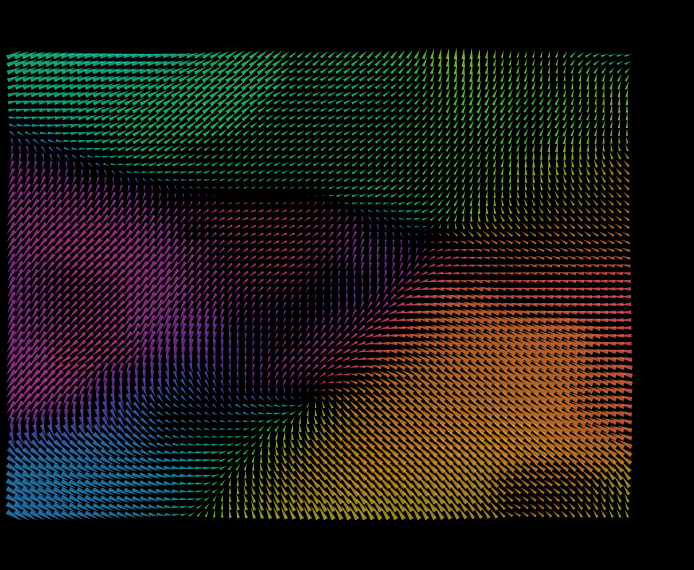

In [9]:
utils.vega.svgFromSpec({
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "description": "Vector array map showing wind speed and direction.",
  "width": 615,
  "height": 560,
  "background": "black",
  "data": {
    "url": "https://vega.github.io/vega-lite/examples/data/windvectors.csv",
    "format": {"type": "csv", "parse": {"longitude": "number", "latitude": "number"}}
  },
  "projection": {"type": "identity"},
  "mark": {"type": "point", "shape": "wedge", "filled": true},
  "encoding": {
    "longitude": {"field": "longitude", "type": "quantitative"},
    "latitude": {"field": "latitude", "type": "quantitative"},
    "color": {
      "field": "dir", "type": "quantitative",
      "scale": {"domain": [0, 360], "scheme": "rainbow"},
      "legend": null
    },
    "angle": {
      "field": "dir", "type": "quantitative",
      "scale": {"domain": [0, 360], "range": [180, 540]}
    },
    "size": {
      "field": "speed", "type": "quantitative",
      "scale": {"rangeMax": 500}
    }
  },
  "config": {
    "aria": false,
    "view": {"step": 10, "fill": "black"}
  }
})

## Vega-Lite Projection Alternative

As an alternative to building a map (through projection), we can instead sort by the latitude and longitude values and simply place them on a grid. (Making the process quite a bit simpler)

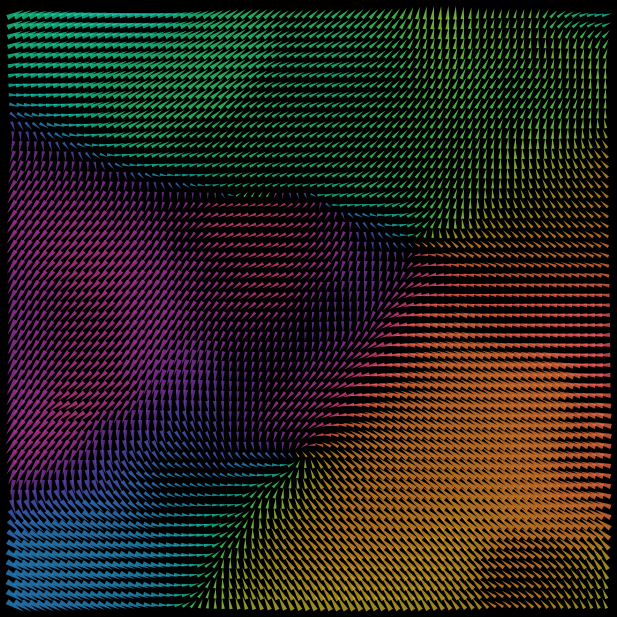

In [10]:
utils.vega.svg((vl) => vl.markPoint({shape: 'wedge', filled: true})
  .data(vl.csv('https://vega.github.io/vega-lite/examples/data/windvectors.csv').parse({longitude: 'number', latitude: 'number'}))
  .width(600).height(600)
  .encode(
    vl.x().fieldO('longitude').sort('ascending').axis(null),
    vl.y().fieldO('latitude').sort('ascending').axis(null),
    vl.color().fieldQ('dir').legend(null).scale({domain: [0, 360], scheme: 'rainbow'}),
    vl.angle().fieldQ('dir').scale({domain: [0, 360], range: [180, 540]}),
    vl.size().fieldQ('speed').scale({range: [50, 600]}).legend(null)
  )
  .config({view: {step: 11, stroke: null}}) // use 11px steps for x and y scales
  .background('black')
)

## Details on the wind vectors CSV

for anyone curious

In [11]:
utils.ijs.await(async(display, console) => {
    windVectorsString = await utils.dataset.fetchText('https://vega.github.io/vega-lite/examples/data/windvectors.csv');
})

In [12]:
windVectors = windVectorsString.split('\r\n')
    .map(line => line.split(','))
    .slice(1)
    .map(([ longitude, latitude, dir, dirCat, speed]) => ({longitude, latitude, dir, dirCat, speed}));
['windVectors']

[ 'windVectors' ]

In [13]:
windVectors[0]

{
  longitude: '0.125',
  latitude: '45.125',
  dir: '228',
  dirCat: '225',
  speed: '3.12'
}